In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [76]:
local_path = 'eaf_data/'    # Enter folder name on your local directory here.

# Importing and Cleaning Data

EAF parameters info from Kaggle:

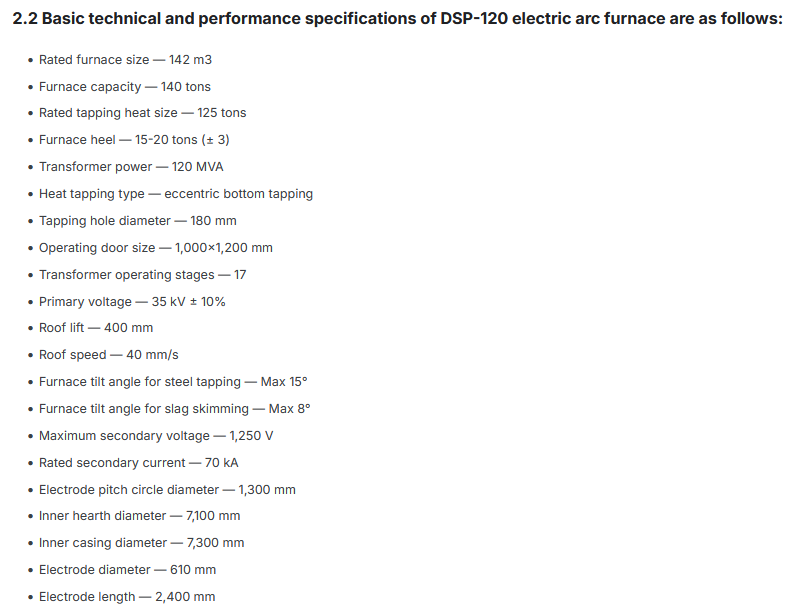

## Basket Charging Data (Ferrous Scrap + Fluxes)

In [77]:
df_basket_charged = pd.read_csv(local_path+'basket_charged.csv')    # Data for basket (bucket) charged materials, mainly ferrous scrap and fluxes.

df_basket_charged['CHARGED_AMOUNT'] = pd.to_numeric(df_basket_charged['CHARGED_AMOUNT'], errors='coerce')   # Change charge weights to numeric (values in kg).
df_basket_charged['DATETIME'] = pd.to_datetime(df_basket_charged['DATETIME'], errors='coerce')  # Change datetime to datetime.

df_basket_charged.head()    # For each heat (batch of liquid steel made in the EAF - identified by 'HEATID') there are several rows for the various types of material ('MAT_DEC').

C:\Users\jilai\AppData\Local\Temp\ipykernel_4572\1878316840.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_basket_charged = pd.read_csv(local_path+'basket_charged.csv')    # Data for basket (bucket) charged materials, mainly ferrous scrap and fluxes.


,MAT_CODE,MAT_DEC,HEATID,DATETIME,CHARGED_AMOUNT
0,205051,3A,6F0020,2016-01-01 18:51:00,54071.0
1,205051,3A,6F0020,2016-01-01 19:24:00,75240.0
2,360258,In-house produced lime,6F0020,2016-01-01 18:33:00,2502.0
3,205051,3A,6F0020,2016-01-01 18:51:00,4773.0
4,360258,In-house produced lime,6F0020,2016-01-01 18:51:00,2500.0


In [78]:
df_basket_charged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137685 entries, 0 to 137684
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   MAT_CODE        137685 non-null  int64         
 1   MAT_DEC         137685 non-null  object        
 2   HEATID          137685 non-null  object        
 3   DATETIME        137685 non-null  datetime64[ns]
 4   CHARGED_AMOUNT  133339 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.3+ MB


In [79]:
df_basket_charged_heats = pd.pivot_table(df_basket_charged, values='CHARGED_AMOUNT', index='HEATID', columns=['MAT_DEC'], aggfunc='sum', fill_value=0)  # Pivot table to get charge weights on a per-heat basis. Fill value of 0 indicates none of that material was used.
df_basket_charged_heats.describe()  # Shows that data needs to be cleaned - some columns report 'negative' charge weights!

MAT_DEC,16A,25A,25A1,26A,3A,3A (shop pipe waste),3ACh,3B23,Aluminum briquet,Artificial graphite 0.1-2.5 mm,B11,B68,Briquets 6A,Coke 10-30 mm,FMN 78 GOST4755-91 class 4,FOMI,FOMI B2,FeCr025,FeSi65-4,Ferrous scrap 6A,Flux FIM,High-carbon ferrochromium,Hot briquet iron,In-house produced lime,Iron scrap,Ladle scrap,Lime,"Lime, grade 2",Liquid scrap,Magma,Magma-P,MnSi17A,Mo material briquet,Mo pellets,SIMP-RM,Scrap 3B22,Scrap B23,Scrap G/B 25A,Scrap G/B 25AS,Secondary aluminum AV 87,Separation scrap,Separation waste 3A,Shram 75,Steel scrap G/B 25A,Steelmaking iron,Vanadium alloy
count,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.0,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.0,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000
mean,4810.282322,168.789099,1965.222196,9.822647,111989.239642,0.0,1825.980102,2.666490,0.009372,6.899452,473.605883,3.101509,52.854946,264.397049,0.264443,-0.004278,8.975248,0.0,0.812266,1012.176103,2.336538,0.096126,407.563347,3460.214650,70.960204,4.137268,865.283380,34.239066,26.050178,5.638277,0.028838,1.857445,0.164376,3.824474,0.190378,2.028742,29.809478,515.807315,118.941796,0.584158,25.466644,57.148563,2.609920,252.839854,797.275978,0.842017
std,4860.204639,973.551093,4552.243897,291.099222,27376.868911,0.0,7523.812337,146.951382,0.981031,76.241841,4468.292974,98.562696,447.581018,431.095595,38.144005,11.337646,111.493010,0.0,29.569752,2772.395729,105.042314,9.804157,2026.582771,2340.555692,526.450603,178.961363,1840.200239,420.115496,1832.310096,96.543179,4.159652,44.672303,11.720608,75.467729,4.221624,146.596026,674.117034,1891.727924,786.762715,8.683088,476.057372,753.826745,343.537745,1639.247895,4085.710384,70.176209
min,0.000000,0.000000,-16967.000000,0.000000,-55612.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.000000,0.000000,-1200.000000,0.000000,0.0,0.000000,-5230.000000,0.000000,0.000000,0.000000,-2490.000000,0.000000,0.000000,0.000000,0.000000,-70000.000000,-400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,108135.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4920.000000,0.000000,0.000000,0.000000,119762.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8503.000000,0.000000,0.000000,0.000000,127309.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,630.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,49366.000000,20854.000000,36268.000000,13890.000000,214225.000000,0.0,75137.000000,10052.000000,120.000000,1900.000000,88360.000000,3760.000000,13500.000000,9991.000000,5502.000000,11

In [80]:
df_basket_charged_heats = df_basket_charged_heats[df_basket_charged_heats.ge(0).all(axis='columns') & df_basket_charged_heats.le(140000).all(axis='columns')]   # Filter out any heats where a negative weight was recorded, or where the charge weight was greater than the EAF total capacity of 140 tonnes
df_basket_charged_heats

MAT_DEC,16A,25A,25A1,26A,3A,3A (shop pipe waste),3ACh,3B23,Aluminum briquet,Artificial graphite 0.1-2.5 mm,B11,B68,Briquets 6A,Coke 10-30 mm,FMN 78 GOST4755-91 class 4,FOMI,FOMI B2,FeCr025,FeSi65-4,Ferrous scrap 6A,Flux FIM,High-carbon ferrochromium,Hot briquet iron,In-house produced lime,Iron scrap,Ladle scrap,Lime,"Lime, grade 2",Liquid scrap,Magma,Magma-P,MnSi17A,Mo material briquet,Mo pellets,SIMP-RM,Scrap 3B22,Scrap B23,Scrap G/B 25A,Scrap G/B 25AS,Secondary aluminum AV 87,Separation scrap,Separation waste 3A,Shram 75,Steel scrap G/B 25A,Steelmaking iron,Vanadium alloy
HEATID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5F0002,0.0,0.0,0.0,0.0,105928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17560.0,0.0
5F0003,0.0,0.0,0.0,0.0,108033.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5473.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15320.0,0.0
5F0004,0.0,0.0,0.0,0.0,128245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5470.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5F0005,0.0,0.0,0.0,0.0,106941.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16820.0,0.0
5F0006,0.0,0.0,0.0,0.0,127035.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5470.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8F5226,0.0,0.0,0.0,0.0,93327.0,0.0,10369.0,0.0,0.0,0.0,12147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8F5227,0.0,0.0,0.0,0.0,91854.0,0.0,10628.0,0.0,0.0,0.0,13083.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6502.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6670.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8F5471,0.0,0.0,0.0,0.0,35528.0,0.0,52291.0,0.0,0.0,0.0,21973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4002.0,0.0,0.0,0.0,0.0,0.0,0.0,692.0,0.0,0.0,10423.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
df_basket_charged_heats['Total_Scrap_Charge'] = df_basket_charged_heats.sum(axis='columns') # Create a new feature which is the total charge weight.
df_basket_charged_heats['Total_Scrap_Charge_Prev'] = df_basket_charged_heats['Total_Scrap_Charge'].shift(1) # Create new feature which is the charge weight in the previous heat.
df_basket_charged_heats

MAT_DEC,16A,25A,25A1,26A,3A,3A (shop pipe waste),3ACh,3B23,Aluminum briquet,Artificial graphite 0.1-2.5 mm,B11,B68,Briquets 6A,Coke 10-30 mm,FMN 78 GOST4755-91 class 4,FOMI,FOMI B2,FeCr025,FeSi65-4,Ferrous scrap 6A,Flux FIM,High-carbon ferrochromium,Hot briquet iron,In-house produced lime,Iron scrap,Ladle scrap,Lime,"Lime, grade 2",Liquid scrap,Magma,Magma-P,MnSi17A,Mo material briquet,Mo pellets,SIMP-RM,Scrap 3B22,Scrap B23,Scrap G/B 25A,Scrap G/B 25AS,Secondary aluminum AV 87,Separation scrap,Separation waste 3A,Shram 75,Steel scrap G/B 25A,Steelmaking iron,Vanadium alloy,Total_Scrap_Charge,Total_Scrap_Charge_Prev
HEATID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5F0002,0.0,0.0,0.0,0.0,105928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17560.0,0.0,128590.0,NaN
5F0003,0.0,0.0,0.0,0.0,108033.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5473.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15320.0,0.0,128826.0,128590.0
5F0004,0.0,0.0,0.0,0.0,128245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5470.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133715.0,128826.0
5F0005,0.0,0.0,0.0,0.0,106941.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16820.0,0.0,129233.0,133715.0
5F0006,0.0,0.0,0.0,0.0,127035.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5470.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132505.0,129233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8F5226,0.0,0.0,0.0,0.0,93327.0,0.0,10369.0,0.0,0.0,0.0,12147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128886.0,133157.0
8F5227,0.0,0.0,0.0,0.0,91854.0,0.0,10628.0,0.0,0.0,0.0,13083.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6502.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6670.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128737.0,128886.0
8F5471,0.0,0.0,0.0,0.0,35528.0,0.0,52291.0,0.0,0.0,0.0,21973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4002.0,0.0,0.0,0.0,0.0,0.0,0.0,692.0,0.0,0.0,10423.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,124999.0,128737.0


<Axes: >

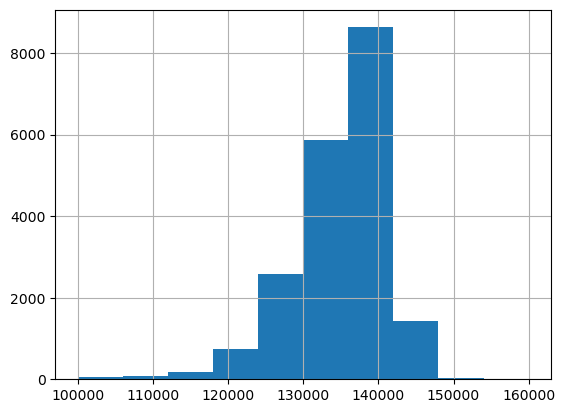

In [82]:
df_basket_charged_heats['Total_Scrap_Charge'].hist(range=(100000,160000))   # Most charge weights are in this range.

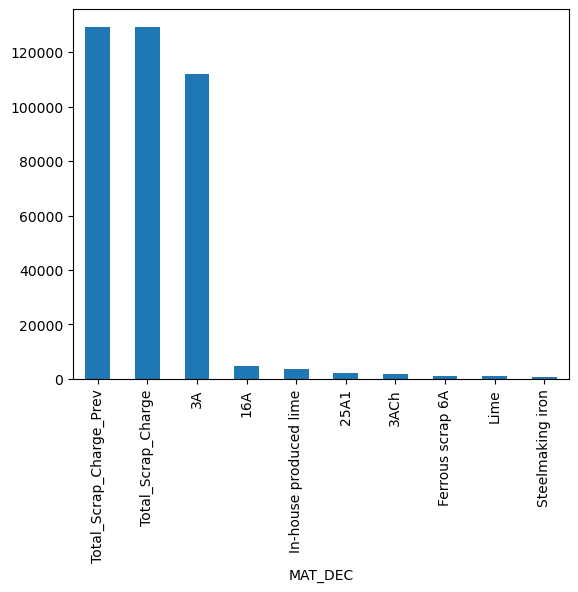

In [83]:
df_basket_charged_heats.mean()[df_basket_charged_heats.mean()>0].sort_values(ascending=False)[:10].plot.bar();

In [84]:
# Extract more info from basket charge data - based on my knowledge of EAF operations, radiative heat loss is a factor when opening the roof to charge from the basket. So make some metrics for basket charge timing.
df_basket_timing = df_basket_charged.groupby('HEATID')['DATETIME'].unique().reset_index(level=0)
df_basket_timing

,HEATID,DATETIME
0,5F0002,"[2015-01-01 01:09:00, 2015-01-01 00:51:00]"
1,5F0003,"[2015-01-01 01:55:00, 2015-01-01 01:39:00]"
2,5F0004,"[2015-01-01 02:24:00, 2015-01-01 02:41:00]"
3,5F0005,"[2015-01-01 03:43:00, 2015-01-01 03:25:00]"
4,5F0006,"[2015-01-01 04:32:00, 2015-01-01 04:15:00]"
...,...,...
20801,8F5226,"[2018-07-20 05:12:00, 2018-07-20 05:28:00]"
20802,8F5227,"[2018-07-20 06:13:00, 2018-07-20 05:56:00]"
20803,8F5471,"[2018-07-29 06:46:00, 2018-07-29 07:51:00, 201..."
20804,8F5472,"[2018-07-29 07:49:00, 2018-07-29 08:03:00]"


In [85]:
import datetime as datetime

df_basket_timing['total_charging_time'] = df_basket_timing['DATETIME'].apply(lambda x: (np.max(x) - np.min(x)).total_seconds())   # Total time between first and last basket charge.
df_basket_timing['num_baskets'] = df_basket_timing['DATETIME'].apply(lambda x: len(x))   # Total time between first and last basket charge.

df_basket_timing = df_basket_timing.drop(columns=['DATETIME'])
df_basket_timing = df_basket_timing.set_index('HEATID')
df_basket_timing

,total_charging_time,num_baskets
HEATID,,
5F0002,1080.0,2
5F0003,960.0,2
5F0004,1020.0,2
5F0005,1080.0,2
5F0006,1020.0,2
...,...,...
8F5226,960.0,2
8F5227,1020.0,2
8F5471,3900.0,4


<Axes: >

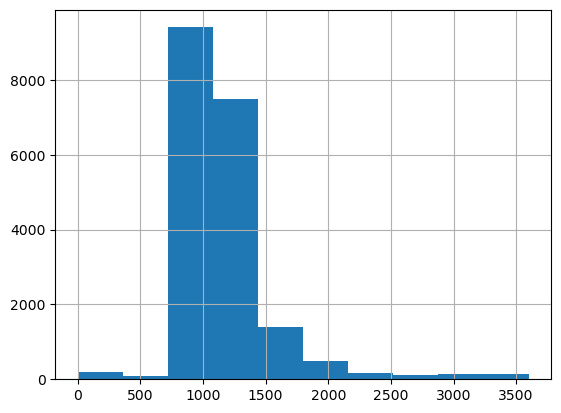

In [86]:
df_basket_timing['total_charging_time'].hist(range=(0,3600))

## Added Materials (Alloys)
This dataset appears to contain other materials charged to the EAF, mainly nonmetallic fluxes and alloying agents (e.g., carbon/coke, lime, magnesium-bearing material).

In [87]:
df_added_mats = pd.read_csv(local_path+'eaf_added_materials.csv')    # Data for alloy additions to the EAF at the start of the heat. This table is similar to the basket_charged file, and should be processed the same way.

df_added_mats['CHARGE_AMOUNT'] = pd.to_numeric(df_added_mats['CHARGE_AMOUNT'], errors='coerce') # Change to numeric (kg)
df_added_mats['DATETIME'] = pd.to_datetime(df_added_mats['DATETIME'], errors='coerce')  # Change to datetime

df_added_mats.info()    # For each heat (batch of liquid steel made in the EAF - identified by 'HEATID') there are several rows for the various types of material ('MAT_DEC').

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79944 entries, 0 to 79943
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MAT_CODE       79944 non-null  int64         
 1   MAT_DEC        79944 non-null  object        
 2   HEATID         79944 non-null  object        
 3   DATETIME       79944 non-null  datetime64[ns]
 4   CHARGE_AMOUNT  79893 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.0+ MB


In [88]:
df_added_mats_heats = pd.pivot_table(df_added_mats, values='CHARGE_AMOUNT', index='HEATID', columns=['MAT_DEC'], aggfunc='sum', fill_value=0)  # Pivot table to get charge weights on a per-heat basis. Fill value of 0 indicates none of that material was used.
df_added_mats_heats.describe()  # Shows that data needs to be cleaned - some columns report 'negative' charge weights! Furthermore, many 'MAT_DEC' from this table are shared with the 'basket_charged' table, except the quantities here are much smaller.

MAT_DEC,25A,25A1,3A,3ACh,AShM 75,Aluminum briquet,Anthracite,Artificial graphite 0.1-2.5 mm,B68,Briquet BMK-60,CCM 03-10mm,CCM 30-60 mm,Coke 10-30 mm,Dolomite,FGM material,FMN 78 GOST4755-91 class 4,FOMI,FOMI B2,FeCr 850A,FeCr025,FeSi 45,FeSi65-4,Ferrous scrap 6A,Flux FIM,Flux FM-2-1,High-carbon ferrochromium,Hot briquet iron,In-house produced lime,KRS-65,KRS-65 briquets,KShU 75,Lime,"Lime, grade 2",Liquid scrap,Magma,Magma-P,Magnesite brick scrap,MnSi17A,Mo pellets,Pellets AV-87,SIMP-RM,Scrap G/B 25A,Scrap G/B 25AS,Secondary aluminum AV 87,Separation waste 3A,Steel scrap G/B 25A,Steelmaking iron
count,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.0,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.0,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.00000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.0,20506.000000,20506.000000
mean,1.973569,-6.646347,16.502487,2.557495,0.121916,0.029845,0.646104,1.414220,0.041695,0.333415,0.067834,4.357017,1098.671803,1.687652,0.351897,0.026821,0.0,402.516727,0.248513,0.014922,0.043695,0.595923,0.0,2.116112,53.439237,0.058519,-2.012582,373.814249,0.004877,0.715254,0.01107,322.154979,2.329416,207.061348,438.615625,33.493758,6.819126,5.974203,0.201502,-0.051107,0.511606,0.408661,0.257973,3.384083,0.0,6.637569,-2.326148
std,141.415085,472.845809,1709.215160,237.098215,17.458203,1.748985,25.527495,38.541432,5.970705,13.254520,9.713744,96.246798,610.023524,49.813923,15.584126,3.840805,0.0,414.214222,19.249186,2.136884,3.663184,23.434779,0.0,41.352379,174.745519,2.962249,141.524848,724.353373,0.698328,21.595642,1.12098,1068.298141,49.191661,4195.786472,352.019914,141.600294,69.886992,79.376153,15.216518,7.318479,10.366453,58.519896,36.941557,169.001115,0.0,396.090764,205.718567
min,0.000000,-28380.000000,-84210.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-960.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-10640.000000,-37486.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-125000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1048.000000,-300.000000,0.000000,0.000000,-100.000000,0.0,-9950.000000,-20340.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,582.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1098.000000,0.000000,0.000000,0.000000,0.0,500.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,511.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1585.000000,0.000000,0.000000,0.000000,0.0,696.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,515.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,10640.000000,29520.000000,136670.000000,29940.000000,2500.000000,111.000000,1699.000000,1500.000000,855.000000,558.000000,1391.000000,3028.000000,3554.000000,1560.000000,900.000000,550.

In [89]:
df_added_mats_heats = df_added_mats_heats[df_added_mats_heats.ge(0).all(axis='columns') & df_added_mats_heats.le(140000).all(axis='columns')]   # Filter out any heats where a negative weight was recorded, or where the charge weight was greater than the EAF total capacity of 140 tonnes
df_added_mats_heats

MAT_DEC,25A,25A1,3A,3ACh,AShM 75,Aluminum briquet,Anthracite,Artificial graphite 0.1-2.5 mm,B68,Briquet BMK-60,CCM 03-10mm,CCM 30-60 mm,Coke 10-30 mm,Dolomite,FGM material,FMN 78 GOST4755-91 class 4,FOMI,FOMI B2,FeCr 850A,FeCr025,FeSi 45,FeSi65-4,Ferrous scrap 6A,Flux FIM,Flux FM-2-1,High-carbon ferrochromium,Hot briquet iron,In-house produced lime,KRS-65,KRS-65 briquets,KShU 75,Lime,"Lime, grade 2",Liquid scrap,Magma,Magma-P,Magnesite brick scrap,MnSi17A,Mo pellets,Pellets AV-87,SIMP-RM,Scrap G/B 25A,Scrap G/B 25AS,Secondary aluminum AV 87,Separation waste 3A,Steel scrap G/B 25A,Steelmaking iron
HEATID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5F0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,514.0,0.0,0.0,0.0,0.0,835.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,593.0,0.0,0.0,0.0,0.0,0.0,0.0,821.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5F0003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.0,0.0,0.0,0.0,0.0,831.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,594.0,0.0,0.0,0.0,0.0,0.0,0.0,822.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5F0004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1810.0,0.0,0.0,0.0,0.0,830.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,592.0,0.0,0.0,0.0,0.0,0.0,0.0,823.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5F0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,513.0,0.0,0.0,0.0,0.0,829.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,592.0,0.0,0.0,0.0,0.0,0.0,0.0,819.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5F0006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1810.0,0.0,0.0,0.0,0.0,827.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,593.0,0.0,0.0,0.0,0.0,0.0,0.0,824.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8F5227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1962.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,840.0,0.0,0.0,0.0,499.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8F5392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8511.0,0.0,125000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8F5471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,809.0,0.0,0.0,0.0,496.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
pd.options.display.max_columns=100
df_added_mats_heats.describe()

MAT_DEC,25A,25A1,3A,3ACh,AShM 75,Aluminum briquet,Anthracite,Artificial graphite 0.1-2.5 mm,B68,Briquet BMK-60,CCM 03-10mm,CCM 30-60 mm,Coke 10-30 mm,Dolomite,FGM material,FMN 78 GOST4755-91 class 4,FOMI,FOMI B2,FeCr 850A,FeCr025,FeSi 45,FeSi65-4,Ferrous scrap 6A,Flux FIM,Flux FM-2-1,High-carbon ferrochromium,Hot briquet iron,In-house produced lime,KRS-65,KRS-65 briquets,KShU 75,Lime,"Lime, grade 2",Liquid scrap,Magma,Magma-P,Magnesite brick scrap,MnSi17A,Mo pellets,Pellets AV-87,SIMP-RM,Scrap G/B 25A,Scrap G/B 25AS,Secondary aluminum AV 87,Separation waste 3A,Steel scrap G/B 25A,Steelmaking iron
count,20435.0,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.0,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.0,20435.000000,20435.000000,20435.000000,20435.0,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.0,20435.000000,20435.000000,20435.000000,20435.000000,20435.0,20435.000000,20435.0
mean,0.0,1.444580,24.987717,2.566381,0.122339,0.029949,0.648348,1.419134,0.041840,0.334573,0.068069,4.372156,1099.662980,1.693516,0.353120,0.026915,0.0,401.834646,0.249376,0.014974,0.043846,0.597994,0.0,2.123465,53.519011,0.058723,0.0,378.702227,0.004894,0.717739,0.011108,322.610374,2.337509,237.974064,438.806508,33.580670,6.816491,5.994960,0.202202,0.0,0.530022,0.410081,0.258870,3.351798,0.0,0.971373,0.0
std,0.0,206.504268,1435.459001,237.509721,17.488505,1.752020,25.571777,38.608242,5.981069,13.277512,9.730604,96.413519,609.641632,49.900290,15.611163,3.847471,0.0,413.957529,19.282593,2.140593,3.669541,23.475431,0.0,41.423970,174.888665,2.967389,0.0,665.386797,0.699540,21.633086,1.122925,1069.022651,49.276856,3712.374336,352.091280,141.776739,69.908476,79.513151,15.242926,0.0,10.165418,58.621469,37.005677,169.267184,0.0,98.187055,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,586.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1098.000000,0.000000,0.000000,0.000000,0.0,499.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,511.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1585.000000,0.000000,0.000000,0.000000,0.0,686.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,707.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
max,0.0,29520.000000,136670.000000,29940.000000,2500.000000,111.000000,1699.000000,1500.000000,855.000000,558.000000,1391.000000,3028.000000,3554.000000,1560.000000,900.000000,550.000000,0.0,2281.000000,1800.000000,306.000000,341.000000,1550.000000,0.0,1587.000000,1435.000000,150.000000,0.0,11328.000000,100.000000,1000.000000,115.000000,11000.000000,2516.000000,125000.000000,328

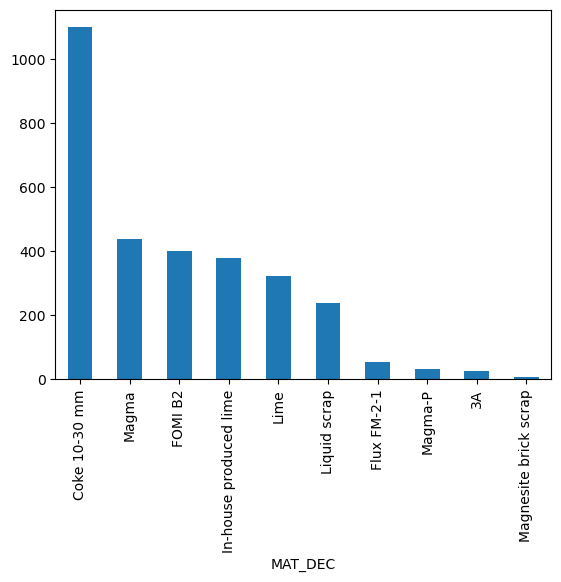

In [91]:
df_added_mats_heats.mean()[df_added_mats_heats.mean()>0].sort_values(ascending=False)[:10].plot.bar();

## Liquid Steel Chemistry
Chemical analysis for final liquid steel bath in the EAF.

In [92]:
df_steel_chem = pd.read_csv(local_path+'eaf_final_chemical_measurements.csv', decimal=',')    # Data for chemical analysis of final steel. The dataset may originate from Europe as ',' is used for decimals.

for col in df_steel_chem.columns[3:]:
    df_steel_chem[col] = pd.to_numeric(df_steel_chem[col], errors='coerce') # Change to numeric (%)

df_steel_chem['DATETIME'] = pd.to_datetime(df_steel_chem['DATETIME'], errors='coerce')  # Change to datetime

df_steel_chem.info()    # For each heat (batch of liquid steel made in the EAF - identified by 'HEATID') there are several rows for the various types of material ('MAT_DEC').

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   HEATID       3709 non-null   object        
 1   POSITIONROW  3709 non-null   int64         
 2   DATETIME     3709 non-null   datetime64[ns]
 3   VALC         3341 non-null   float64       
 4   VALSI        3341 non-null   float64       
 5   VALMN        3341 non-null   float64       
 6   VALP         3340 non-null   float64       
 7   VALS         3341 non-null   float64       
 8   VALCU        3341 non-null   float64       
 9   VALCR        3341 non-null   float64       
 10  VALMO        3341 non-null   float64       
 11  VALNI        3341 non-null   float64       
 12  VALAS        3341 non-null   float64       
 13  VALSN        3340 non-null   float64       
 14  VALN         2417 non-null   float64       
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)


In [93]:
df_steel_chem.set_index('HEATID', inplace=True)
df_steel_chem.head()

,POSITIONROW,DATETIME,VALC,VALSI,VALMN,VALP,VALS,VALCU,VALCR,VALMO,VALNI,VALAS,VALSN,VALN
HEATID,,,,,,,,,,,,,,
6F0037,1,2016-01-02 11:02:00,0.0545,0.0197,0.0632,0.0040,0.0210,0.2145,0.0504,0.0165,0.1307,0.0064,0.0209,0.0124
6F0042,1,2016-01-02 15:22:00,0.0692,0.0167,0.0598,0.0042,0.0158,0.2278,0.0864,0.0166,0.1684,0.0064,0.0072,0.0110
6F0045,1,2016-01-02 18:05:00,0.0558,0.0169,0.0666,0.0053,0.0203,0.2315,0.1100,0.0176,0.1790,0.0063,0.0107,0.0105
6F0096,1,2016-01-04 17:30:00,0.0620,0.0156,0.0811,0.0046,0.0211,0.1677,0.0596,0.0112,0.0948,0.0061,0.0055,0.0118
6F0098,1,2016-01-04 19:19:00,0.0501,0.0144,0.0604,0.0054,0.0251,0.1850,0.0448,0.0111,0.1033,0.0064,0.0061,0.0133


<Axes: >

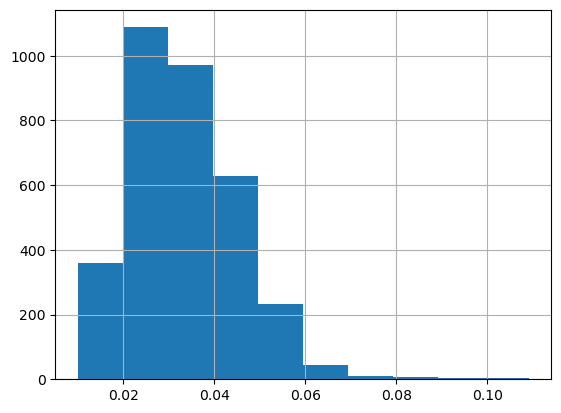

In [94]:
df_steel_chem['VALS'].hist()    # For fun, plot histogram of sulfur analysis. Sulfur is an important alloy/contaminant of raw steel.

# Liquid Steel Temperature
Contains tapping temperature and dissolved oxygen data.

In [95]:
df_steel_temp = pd.read_csv(local_path+'eaf_temp.csv', decimal=',')    # Data for temperature of final steel. ',' is used for decimals.

for col in df_steel_temp.columns[2:]:
    df_steel_temp[col] = pd.to_numeric(df_steel_temp[col], errors='coerce') # Change to numeric

df_steel_temp['DATETIME'] = pd.to_datetime(df_steel_temp['DATETIME'], errors='coerce')  # Change to datetime

df_steel_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85104 entries, 0 to 85103
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   HEATID     85104 non-null  object        
 1   DATETIME   85104 non-null  datetime64[ns]
 2   TEMP       85104 non-null  float64       
 3   VALO2_PPM  85104 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.6+ MB


In [96]:
df_steel_temp.set_index('HEATID', inplace=True)
df_steel_temp.head()    # There are duplicated HEATID's - because there are multiple temperature and O2 measurements at the end of the heat.

,DATETIME,TEMP,VALO2_PPM
HEATID,,,
6F0020,2016-01-01 19:15:00,1650.0,1242.0
6F0021,2016-01-01 20:05:00,1649.0,1160.0
6F0021,2016-01-01 20:05:00,1649.0,1160.0
6F0021,2016-01-01 20:03:00,1606.0,1152.0
6F0022,2016-01-01 21:03:00,1636.0,947.0


In [97]:
df_steel_temp.replace(0, np.nan, inplace=True)    # Impute 0 with nan as there was no measurement (impossible to have 0 temp or oxygen content)
df_steel_temp = df_steel_temp.groupby('HEATID').mean()  # Aggregate to HEATID's
df_steel_temp

,DATETIME,TEMP,VALO2_PPM
HEATID,,,
5F0002,2015-01-01 01:31:00.000000000,1627.000000,383.000000
5F0003,2015-01-01 02:17:30.000000000,1641.000000,683.000000
5F0004,2015-01-01 03:17:30.000000000,1636.000000,700.000000
5F0005,2015-01-01 04:06:00.000000000,1630.000000,625.333333
5F0006,2015-01-01 04:54:24.000000000,1622.000000,654.600000
...,...,...,...
8F5227,2018-07-20 06:34:30.000000000,1624.750000,584.666667
8F5392,2018-07-25 21:40:15.789473792,1649.315789,168.000000
8F5471,2018-07-29 07:37:00.000000000,1630.000000,731.400000


<Axes: >

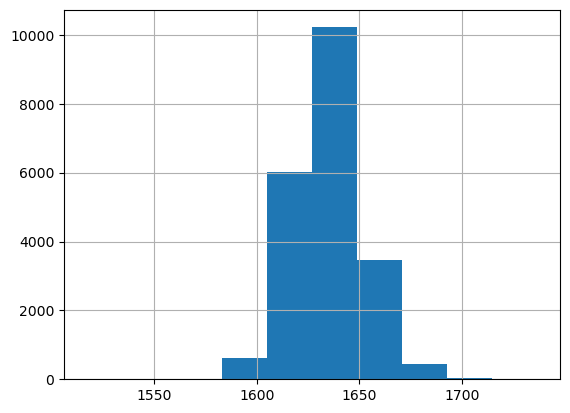

In [98]:
df_steel_temp['TEMP'].hist()    # Histogram of steel temperature - critical KPI for any meltshop.

# EAF Gas Lance (Injected Gaseous Fuels/Reagents)
This dataset has information on natural gas ('gas') and oxygen which are injected into the furnace as a fuel to help melt the scrap, as well as a reagent to control the carbon content of the steel.

In [99]:
df_gaslance = pd.read_csv(local_path+'eaf_gaslance_mat.csv', decimal=',', parse_dates=True)    # Data for temperature of final steel. ',' is used for decimals.

df_gaslance['REVTIME'] = pd.to_datetime(df_gaslance['REVTIME'], format="%Y-%m-%d %H:%M:%S,%f", errors='coerce')
df_gaslance = df_gaslance.sort_values(by='REVTIME') # Make sure all data is sorted by the logged time.

df_gaslance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5748194 entries, 3825874 to 3825873
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   REVTIME     datetime64[ns]
 1   O2_AMOUNT   float64       
 2   GAS_AMOUNT  float64       
 3   O2_FLOW     float64       
 4   GAS_FLOW    float64       
 5   HEATID      object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 307.0+ MB


In [100]:
df_gaslance_heats = df_gaslance.groupby('HEATID').tail(1)   # The total oxygen and gas volume is recorded cumulatively during a heat. Grabbing the tail(1) gives only the last reading, which should be t he total amount during the heat.
df_gaslance_heats.set_index('HEATID', inplace=True)
df_gaslance_heats.drop(columns=['O2_FLOW', 'GAS_FLOW'], inplace=True) # Drop these ones as they are not integrated (i.e., meaningless when aggregated)
df_gaslance_heats.head()

C:\Users\jilai\AppData\Local\Temp\ipykernel_4572\2384578899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gaslance_heats.drop(columns=['O2_FLOW', 'GAS_FLOW'], inplace=True) # Drop these ones as they are not integrated (i.e., meaningless when aggregated)


,REVTIME,O2_AMOUNT,GAS_AMOUNT
HEATID,,,
5F0002,2015-01-01 01:37:37.664,3659.0,1160.0
5F0003,2015-01-01 02:22:47.492,3469.0,1117.0
5F0004,2015-01-01 03:24:12.680,3605.0,1204.0
5F0005,2015-01-01 04:12:55.117,3678.0,1191.0
5F0006,2015-01-01 05:01:37.617,3655.0,1171.0


# EAF Injectants
This dataset contains information about injected carbon (usually coal) - carbon injection is used to generate gases that help refine the steel bath and form a 'foamy slag' which enhances electric arc heat transfer.

In [101]:
df_injectant = pd.read_csv(local_path+'inj_mat.csv', decimal=',', parse_dates=True)    # Data for injectants.

df_injectant['REVTIME'] = pd.to_datetime(df_injectant['REVTIME'], format="%Y-%m-%d %H:%M:%S,%f", errors='coerce')
df_injectant = df_injectant.sort_values(by='REVTIME') # Make sure all data is sorted by the logged time.

df_injectant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4011646 entries, 2567496 to 2567495
Data columns (total 4 columns):
 #   Column             Dtype         
---  ------             -----         
 0   REVTIME            datetime64[ns]
 1   INJ_AMOUNT_CARBON  float64       
 2   INJ_FLOW_CARBON    float64       
 3   HEATID             object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 153.0+ MB


In [102]:
df_injectant_heats = df_injectant.groupby('HEATID').tail(1)
df_injectant_heats.set_index('HEATID', inplace=True)
df_injectant_heats.drop(columns=['INJ_FLOW_CARBON'], inplace=True) # Drop these ones as they are not integrated (i.e., meaningless when aggregated)
df_injectant_heats.head()

C:\Users\jilai\AppData\Local\Temp\ipykernel_4572\3655019827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_injectant_heats.drop(columns=['INJ_FLOW_CARBON'], inplace=True) # Drop these ones as they are not integrated (i.e., meaningless when aggregated)


,REVTIME,INJ_AMOUNT_CARBON
HEATID,,
5F0002,2015-01-01 01:37:37.633,1021.0
5F0003,2015-01-01 02:22:47.461,957.0
5F0004,2015-01-01 03:24:12.664,789.0
5F0005,2015-01-01 04:12:55.101,812.0
5F0006,2015-01-01 05:01:37.601,882.0


# Transformer/Electrical Data
This dataset provides data from the electrical supply system, which allows us to calculate the energy consumption of the process.

In [103]:
df_transformer = pd.read_csv(local_path+'eaf_transformer.csv', decimal=',', parse_dates=True)    # Electrical data.

df_transformer['STARTTIME'] = pd.to_datetime(df_transformer['STARTTIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_transformer = df_transformer.sort_values(by='STARTTIME') # Make sure all data is sorted by the logged time.

df_transformer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271712 entries, 180214 to 180210
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   TAP        271712 non-null  int64         
 1   HEATID     271712 non-null  object        
 2   STARTTIME  271712 non-null  datetime64[ns]
 3   DURATION   271712 non-null  object        
 4   MW         271712 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 12.4+ MB


In [104]:
df_transformer_heats = pd.DataFrame(df_transformer.set_index('HEATID')['MW'].groupby('HEATID').sum())    # Checking the 'MW' column. Based on the value, it seems the column actually refers to the MWh of energy (not units of power!!!) used. So, we will not need to manually integrate to get the power.
df_transformer_heats.head()

,MW
HEATID,
5F0002,48.625
5F0003,48.625
5F0004,47.375
5F0005,49.250
5F0006,49.875


# Merging Data and Getting Design Matrix
Merge all the processed datasets to get the design matrix. The final column 'MW' is the target variable.

In [105]:
df_transformer_heats

,MW
HEATID,
5F0002,48.625
5F0003,48.625
5F0004,47.375
5F0005,49.250
5F0006,49.875
...,...
8F5226,49.500
8F5227,51.250
8F5471,49.500


In [106]:
df_design = df_basket_charged_heats.join(
    df_added_mats_heats,
    on='HEATID',
    rsuffix=' Added'
).join(
    df_basket_timing, 
    on='HEATID'
).join(
    df_steel_chem.drop(columns=['POSITIONROW', 'DATETIME']),    # Drop redundane rows (no data in POSITIONROW, and we will get DATETIME elsewhere)
    on='HEATID'
).join(
    df_steel_temp,   # Do not drop the datetime, as we will consider the DATETIME of the chemical test to be the 'true' finish time for the heat
    on='HEATID'
).join(
    df_gaslance_heats.drop(columns=['REVTIME']),
    on='HEATID'
).join(
    df_injectant_heats.drop(columns=['REVTIME']),
    on='HEATID'
).join(
    df_transformer_heats,
    on='HEATID'
)

df_design.head()    # This is the full design matrix. The final column 'MW' is the target (y) which is the amount of energy (in MWh) used to make that heat of steel.

,16A,25A,25A1,26A,3A,3A (shop pipe waste),3ACh,3B23,Aluminum briquet,Artificial graphite 0.1-2.5 mm,B11,B68,Briquets 6A,Coke 10-30 mm,FMN 78 GOST4755-91 class 4,FOMI,FOMI B2,FeCr025,FeSi65-4,Ferrous scrap 6A,Flux FIM,High-carbon ferrochromium,Hot briquet iron,In-house produced lime,Iron scrap,Ladle scrap,Lime,"Lime, grade 2",Liquid scrap,Magma,Magma-P,MnSi17A,Mo material briquet,Mo pellets,SIMP-RM,Scrap 3B22,Scrap B23,Scrap G/B 25A,Scrap G/B 25AS,Secondary aluminum AV 87,Separation scrap,Separation waste 3A,Shram 75,Steel scrap G/B 25A,Steelmaking iron,Vanadium alloy,Total_Scrap_Charge,Total_Scrap_Charge_Prev,25A Added,25A1 Added,...,FeCr 850A,FeCr025 Added,FeSi 45,FeSi65-4 Added,Ferrous scrap 6A Added,Flux FIM Added,Flux FM-2-1,High-carbon ferrochromium Added,Hot briquet iron Added,In-house produced lime Added,KRS-65,KRS-65 briquets,KShU 75,Lime Added,"Lime, grade 2 Added",Liquid scrap Added,Magma Added,Magma-P Added,Magnesite brick scrap,MnSi17A Added,Mo pellets Added,Pellets AV-87,SIMP-RM Added,Scrap G/B 25A Added,Scrap G/B 25AS Added,Secondary aluminum AV 87 Added,Separation waste 3A Added,Steel scrap G/B 25A Added,Steelmaking iron Added,total_charging_time,num_baskets,VALC,VALSI,VALMN,VALP,VALS,VALCU,VALCR,VALMO,VALNI,VALAS,VALSN,VALN,DATETIME,TEMP,VALO2_PPM,O2_AMOUNT,GAS_AMOUNT,INJ_AMOUNT_CARBON,MW
HEATID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5F0002,0.0,0.0,0.0,0.0,105928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17560.0,0.0,128590.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,593.0,0.0,0.0,0.0,0.0,0.0,0.0,821.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1080.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 01:31:00,1627.0,383.000000,3659.0,1160.0,1021.0,48.625
5F0003,0.0,0.0,0.0,0.0,108033.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5473.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15320.0,0.0,128826.0,128590.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,594.0,0.0,0.0,0.0,0.0,0.0,0.0,822.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,960.0,2,0.0823,0.0172,0.0615,0.0823,0.0361,0.1913,0.0916,0.0172,0.1075,0.0053,0.0068,0.0361,2015-01-01 02:17:30,1641.0,683.000000,3469.0,1117.0,957.0,48.625
5F0004,0.0,0.0,0.0,0.0,128245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5470.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133715.0,128826.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,592.0,0.0,0.0,0.0,0.0,0.0,0.0,823.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1020.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 03:17:30,1636.0,700.000000,3605.0,1204.0,789.0,47.375
5F0005,0.0,0.0,0.0,0.0,106941.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16820.0,0.0,129233.0,133715.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,592.0,0.0,0.0,0.0,0.0,0.0,0.0,819.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1080.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 04:06:00,1630.0,625.333333,3678.0,1191.0,812.0,49.250
5F0006,0.0,0.0,0.0,0.0,127035.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5470.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132505.0,129233.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,593.0,0.0,0.0,0.0,0.0,0.0,0.0,824.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1020.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 04:54:24,1622.0,654.600000,3655.0,1171.0,882.0,49.875


(30.0, 60.0)

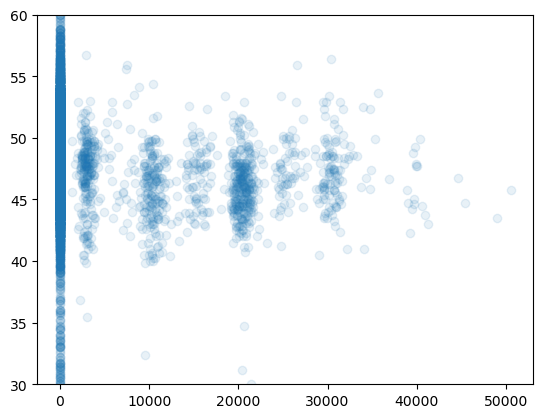

In [150]:
fig, ax = plt.subplots()

ax.scatter(
    df_design['Steelmaking iron'],
    df_design['MW'],
    alpha=0.1
)

# ax.set_xlim(0, 0.2)
ax.set_ylim([30, 60])

<Axes: >

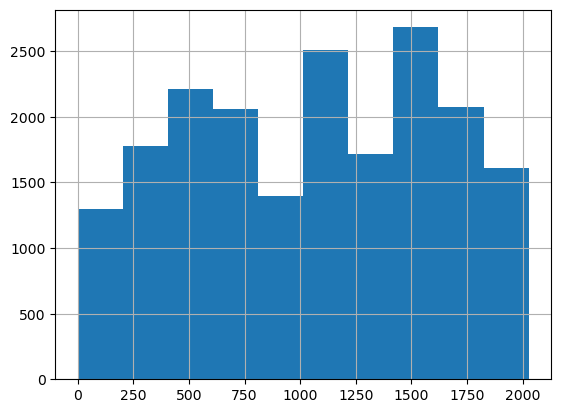

In [116]:
temp = df_design['Coke 10-30 mm Added']

temp.hist(
    range = (temp.quantile(0.01), temp.quantile(0.95))
)

<Axes: >

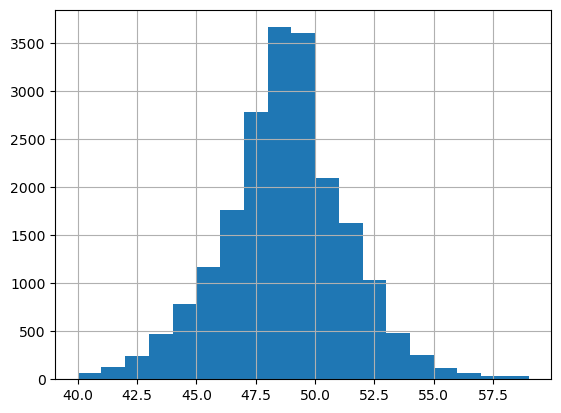

In [35]:
df_design['MW'].hist(
    bins = np.arange(40, 60, 1)
)

In [151]:
df_design.to_csv('design_matrix_ver_1.csv') # Save matrix to path for future use.